In [1]:
import cx_Oracle
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer
import imblearn
import numpy as np
import pickle 
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
connection = cx_Oracle.connect(user="admin", password="Projetmachine1", dsn="ProjetDB_low")
cursor = connection.cursor()

In [3]:
df = pd.read_sql("""select  * from CREDIT_FINAL""", con=connection)

In [4]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
# Total missing values
    mis_val = df.isnull().sum()

# Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

# Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

# Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [5]:
#missing_values_table(df)
# Call simplifier to replace missing values that are less that 47%
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
missing_values_table(df)

Your selected dataframe has 119 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
yraw = df["TARGET"].head(50000)
xraw = df.select_dtypes(include=np.number).loc[:,df.columns!="TARGET"].head(50000)
oversample = imblearn.over_sampling.SMOTE()
x, y = oversample.fit_resample(xraw, yraw)

Random forest :  0.9575197171607288
KNN :  0.8275768289366331
KMeans :  0.4968724503671471
Decision tree :  0.910960021756867


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

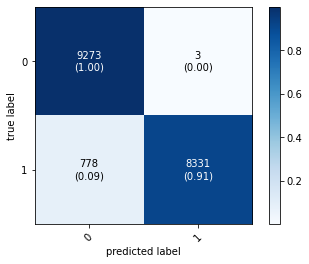

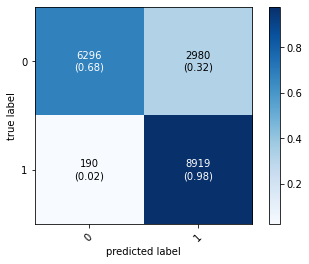

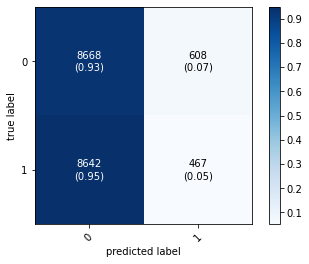

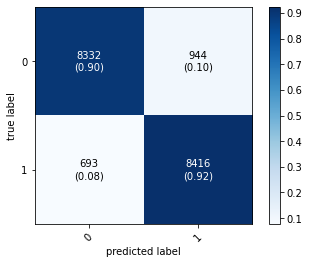

In [18]:
#Random forest
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Random forest : ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),colorbar=True,
                        show_absolute=True, show_normed=True, class_names=[0,1])
#KNN
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("KNN : ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),colorbar=True,
                        show_absolute=True, show_normed=True, class_names=[0,1])
#KMeans
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train,y_train)
y_pred = kmeans.predict(x_test)
print("KMeans : ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),colorbar=True,
                        show_absolute=True, show_normed=True, class_names=[0,1])
#Decision tree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Decision tree : ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),colorbar=True,
                        show_absolute=True, show_normed=True, class_names=[0,1])

In [8]:
rf.feature_importances_
# Créer 1df qui contient les features et leur importance
feature = [column for column in x.columns]
importance = np.round(rf.feature_importances_ * 100, 2)
feature_importance = pd.DataFrame({'feature' : feature, 'importance' : importance})
df_fi=feature_importance.sort_values('importance', ascending=False)
df_fi

,feature,importance
2,CODE_GENDER,6.09
3,FLAG_OWN_CAR,4.48
110,REJECTED_LOAN,4.30
24,FLAG_PHONE,4.25
116,CLIENT_TYPE,3.75
12,NAME_EDUCATION_TYPE,3.73
26,OCCUPATION_TYPE,3.29
39,EXT_SOURCE_2,3.27
36,REG_CITY_NOT_WORK_CITY,2.97
11,NAME_INCOME_TYPE,2.92


In [9]:
cols_sign=df_fi[df_fi["importance"]>0.5]["feature"]
# print(cols_sign
list(cols_sign)

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'REJECTED_LOAN',
 'FLAG_PHONE',
 'CLIENT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_2',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_INCOME_TYPE',
 'DAYS_EMPLOYED_ANOM',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'FLAG_WORK_PHONE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'FLAG_OWN_REALTY',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_FAM_MEMBERS',
 'CASH_LOANS',
 'CNT_CHILDREN',
 'EXT_SOURCE_3',
 'NAME_FAMILY_STATUS',
 'DAYS_EMPLOYED',
 'APPROVED_LOAN',
 'WEEKDAY_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'NB_DEMANDS',
 'CONSUMER_LOANS',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'POS_SK_DPD',
 'REG_CITY_NOT_LIVE_CITY',
 'DAYS_BIRTH',
 'CANCELED_LOAN',
 'DAYS_LAST_PHONE_CHANGE',
 'BUREAU_ACTIVE_LOANS',
 'DAYS_ID_PUBLISH',
 'NAME_TYPE_SUITE',
 'REGION_POPULATION_RELATIVE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'SK_ID_CURR',
 'POS_CNT_INSTALMENT_FUTURE',
 'BUREAU_SUM_AMT_OF

In [10]:
yimpraw = y
ximpraw = x[cols_sign]
oversample = imblearn.over_sampling.SMOTE()
ximp, yimp = oversample.fit_resample(ximpraw, yimpraw)

Random forest :  0.9562768074286978


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

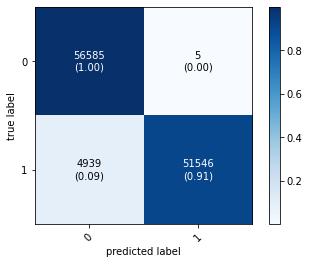

In [11]:
x_train, x_test, y_train, y_test = train_test_split(ximp, yimp, test_size=0.20, random_state=42)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Random forest : ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),colorbar=True,
                        show_absolute=True, show_normed=True, class_names=[0,1])

In [24]:
knnPickle = open('knnpickle_file', 'wb') 
pickle.dump(rf, knnPickle)       

In [16]:
knnPickle = open('knnpickle_file', 'rb')        
file="C:/Users/isno2/Desktop/Cours/Master 2/Machine learning/Projet final/home-credit-default-risk/knnpickle_file"
loaded_model = pickle.load(open(file, 'rb'))
repartition = loaded_model.predict_proba(x_test)

In [42]:
x_test.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'REJECTED_LOAN', 'FLAG_PHONE',
       'CLIENT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_2',
       'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED_ANOM',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'FLAG_WORK_PHONE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'CNT_FAM_MEMBERS', 'CASH_LOANS',
       'CNT_CHILDREN', 'EXT_SOURCE_3', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED',
       'APPROVED_LOAN', 'WEEKDAY_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'NB_DEMANDS', 'CONSUMER_LOANS', 'FLAG_LAST_APPL_PER_CONTRACT',
       'POS_SK_DPD', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_BIRTH', 'CANCELED_LOAN',
       'DAYS_LAST_PHONE_CHANGE', 'BUREAU_ACTIVE_LOANS', 'DAYS_ID_PUBLISH',
       'NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'SK_ID_CU

In [31]:
testlist=['CODE_GENDER', 'NAME_EDUCATION_TYPE','REJECTED_LOAN', 'REG_CITY_NOT_WORK_CITY', 'CLIENT_TYPE', 'FLAG_OWN_CAR', 'EXT_SOURCE_2', 'FLAG_PHONE', 'FLAG_DOCUMENT_3', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS', 'FLAG_OWN_REALTY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED_ANOM', 'ORGANIZATION_TYPE', 'CASH_LOANS', 'FLAG_WORK_PHONE', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_6',
 'NAME_FAMILY_STATUS', 'CANCELED_LOAN', 'APPROVED_LOAN', 'CONSUMER_LOANS', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'NB_DEMANDS', 'DAYS_BIRTH', 'NFLAG_LAST_APPL_IN_DAY', 'POS_SK_DPD', 'FLAG_LAST_APPL_PER_CONTRACT', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'BUREAU_ACTIVE_LOANS', 'POS_NAME_CONTRACT_STATUS', 'POS_SK_DPD_DEF', 'NAME_TYPE_SUITE', 'BUREAU_SUM_AMT_OF_PAST_LOANS', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'POS_CNT_INSTALMENT_FUTURE', 'BUREAU_AVG_AMT_OF_PAST_LOANS', 'AMT_CREDIT', 'DAYS_ENTRY_PAYMENT', 'AMT_ANNUITY', 'DAYS_INSTALMENT', 'POS_CNT_INSTALMENT', 'POS_MONTHS_BALANCE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'HOUR_APPR_PROCESS_START'
]
for col in x_train.columns:
    if col not in testlist:
        print(col)

FLAG_DOCUMENT_8
FLAG_DOCUMENT_6


In [ ]:
loaded_model

In [36]:
import cx_Oracle
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer
import imblearn
import numpy as np
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

connection = cx_Oracle.connect(user="admin", password="Projetmachine1", dsn="ProjetDB_low")
cursor = connection.cursor()

df = pd.read_sql("""select  * from CREDIT_FINAL""", con=connection)

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

yraw = df["TARGET"]
xraw = df.select_dtypes(include=np.number).loc[:,df.columns!="TARGET"]
oversample = imblearn.over_sampling.SMOTE()
x, y = oversample.fit_resample(xraw, yraw)


In [38]:
x=df[['CODE_GENDER', 'NAME_EDUCATION_TYPE','REJECTED_LOAN', 'REG_CITY_NOT_WORK_CITY', 'CLIENT_TYPE', 'FLAG_OWN_CAR', 'EXT_SOURCE_2', 'FLAG_PHONE', 'FLAG_DOCUMENT_3', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS', 'FLAG_OWN_REALTY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED_ANOM', 'ORGANIZATION_TYPE', 'CASH_LOANS', 'FLAG_WORK_PHONE', 'EXT_SOURCE_3', 'DAYS_EMPLOYED',
 'NAME_FAMILY_STATUS', 'CANCELED_LOAN', 'APPROVED_LOAN', 'CONSUMER_LOANS', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'NB_DEMANDS', 'DAYS_BIRTH', 'NFLAG_LAST_APPL_IN_DAY', 'POS_SK_DPD', 'FLAG_LAST_APPL_PER_CONTRACT', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'BUREAU_ACTIVE_LOANS', 'POS_NAME_CONTRACT_STATUS', 'POS_SK_DPD_DEF', 'NAME_TYPE_SUITE', 'BUREAU_SUM_AMT_OF_PAST_LOANS', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'POS_CNT_INSTALMENT_FUTURE', 'BUREAU_AVG_AMT_OF_PAST_LOANS', 'AMT_CREDIT', 'DAYS_ENTRY_PAYMENT', 'AMT_ANNUITY', 'DAYS_INSTALMENT', 'POS_CNT_INSTALMENT', 'POS_MONTHS_BALANCE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'HOUR_APPR_PROCESS_START'
]]

In [39]:
# 'dataset' holds the input data for this script
import pandas as pd
import pickle
knnPickle = open('knnpickle_file', 'rb')        
file="C:/Users/isno2/Desktop/Cours/Master 2/Machine learning/Projet final/home-credit-default-risk/knnpickle_file"
loaded_model = pickle.load(knnPickle)
listtemp = loaded_model.predict_proba(x)[:,0]

c:\users\isno2\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [40]:
listtemp

array([0.5 , 0.52, 0.55, ..., 0.44, 0.44, 0.54])